# Calcul des paramètres de polarimétrie #

Dans ce notebook, je vais calculer le vecteur de Stockes ainsi que l'AOP et le DOP pour des images polarimétriques au format 3 images RGB.



<Figure size 432x288 with 0 Axes>

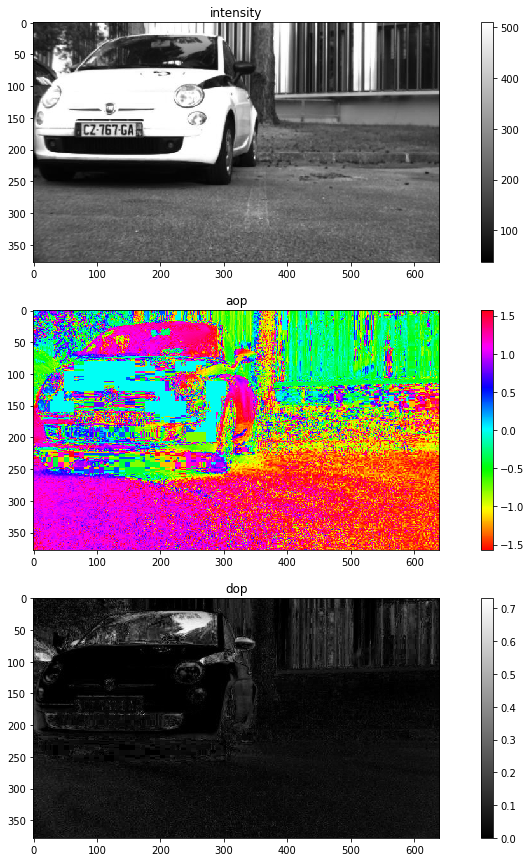

In [31]:
import numpy as np
import pylab as pl
import PIL 

# Calcul de la matrice P
def calcul_params_polarisation(imgs):
    H = mat_H()

    # Calcul des images de Stokes
    # img : liste d'images en format 2darrays
    
    s = stockes(imgs, H)
    
    # Calcul du degré de polarisation de l'image et de l'angle de polarisation de l'image
    
    degop = calcul_dop(s)
    anop = calcul_aop(s)
    
# Tracé de la figure représentant les images de Stokes
    
    pl.figure(1)
    pl.figure(figsize=(15,15))
    #pl.figure(figsize=(15, 45))
    pl.clf()
    pl.subplot(3,1,1)
    pl.imshow(s[0], cmap='gray')
    pl.title('intensity')
    pl.colorbar()
    pl.subplot(3,1,2)
    pl.imshow(anop, cmap='hsv')
    pl.title('aop')
    pl.colorbar()
    pl.subplot(3,1,3)
    degop[degop>1] = 1
    pl.imshow(degop, cmap='gray')
    pl.colorbar()
    pl.title('dop')

# Conversion d'une image en 2darray

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# Calcul des paramètres de Stockes 
def stockes(imgs, H): 
    s = [] # create an empty list
    for i in range(0,3):
        s.append(sum(H[i,j]*img for j, img in enumerate(imgs)))
    return s

def mat_H():
    P = {}
    P['theta'] = np.array([0, 45, 90]) *pl.pi/180
    P['T'] = np.array([0.5, 0.5, 0.5])
    P['P'] = np.array([1., 1., 1.])

    # Calcul de la matrice H, la matrice de calibration de polarisation en format 2darray

    M01s = P['T']
    M02s = np.cos(2*P['theta']) * P['T'] * P['P']
    M03s = np.sin(2*P['theta']) * P['T'] * P['P']
    Mt = np.array((M01s, M02s, M03s))
    H = pl.dot(pl.inv(pl.dot(Mt,Mt.T)), Mt)
    return H

def calcul_dop(s):
    dop = np.sqrt(s[1]**2+s[2]**2)/s[0] # Deg polarisation
    return dop

def calcul_aop(s):
    aop = 0.5*np.arctan2(s[2], s[1]) # Angle polarisation
    return aop
    
# Chargement des images à traiter :

im1 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/0.jpg'))
im2 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/45.jpg'))
im3 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/90.jpg'))

gray_im1 = rgb2gray(im1)
gray_im2 = rgb2gray(im2)
gray_im3 = rgb2gray(im3)

imgs2 = [gray_im1, gray_im2, gray_im3] # Images en niveaux de gris
imgs = [im1, im2, im3] # Images en rgb

calcul_params_polarisation(imgs2)

In [32]:
# Création de nouvelles images au format [s0, s1, s2] et [s0, aop, dop] au lieu de RGB

import matplotlib as mpl

im_Stockes = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

H = mat_H()

s = stockes(imgs, H)

im_Stockes[:,:,0] = rgb2gray(s[0])
im_Stockes[:,:,1] = rgb2gray(s[1])
im_Stockes[:,:,2] = rgb2gray(s[2])

print(type(im_Stockes))

mpl.image.imsave("im1_Stockes.png", im_Stockes)

im_param_pola = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

anop = calcul_aop(s)
degop = calcul_dop(s)

im_param_pola[:,:,0] = rgb2gray(s[0])
im_param_pola[:,:,1] = rgb2gray(anop)
im_param_pola[:,:,2] = rgb2gray(degop)

mpl.image.imsave("im1_param_pola.png", im_param_pola)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'>


processing time:  1.9393665790557861


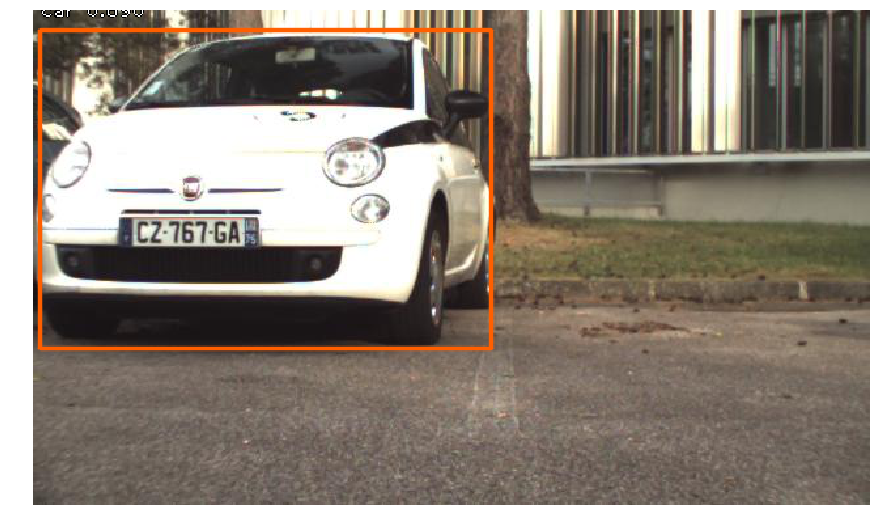

In [6]:
# Detection du contenu de l'image classique 

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

processing time:  2.1454005241394043


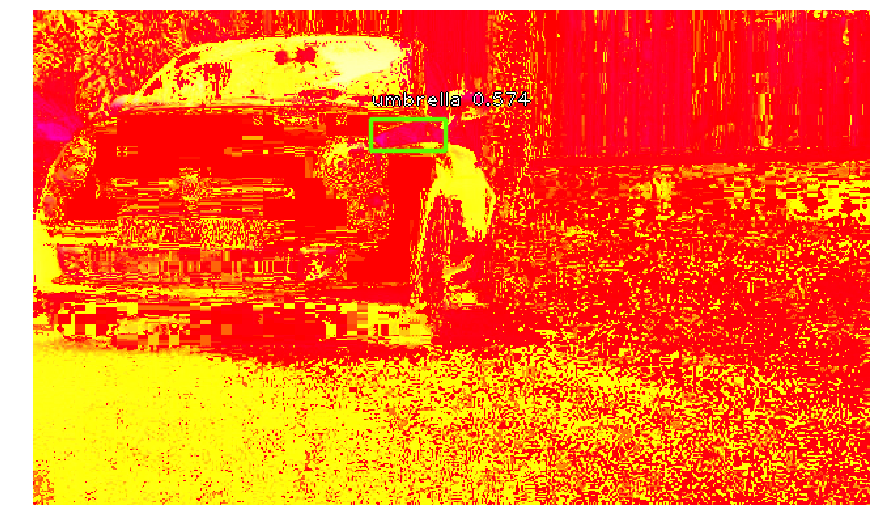

In [7]:
# Détection de l'image construite avec le DOP, l'AOP et l'intensité

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

processing time:  2.360962152481079


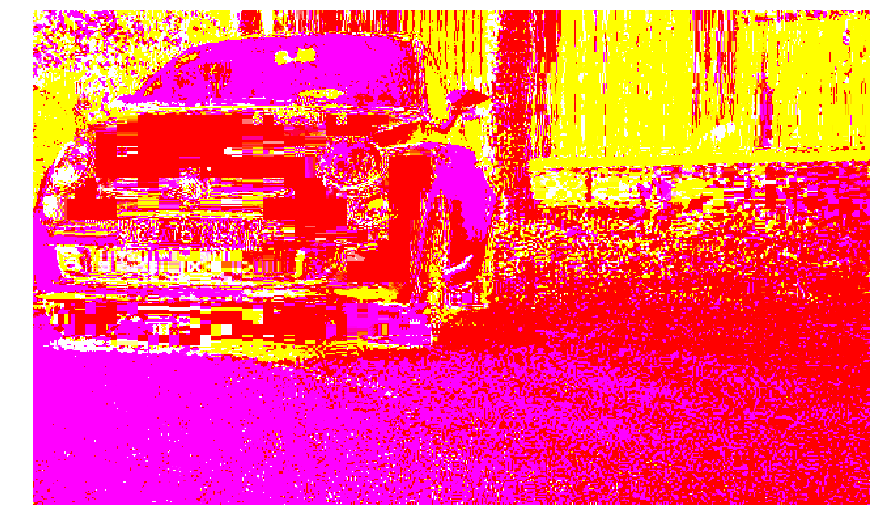

In [8]:
# Image construite avec les paramètres de Stockes

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

In [12]:
# Création de nouvelles images au format [s0, s1, s2] et [s0, aop, dop] au lieu de RGB

import matplotlib as mpl
import PIL

im1 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00044/0.jpg'))
im2 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00044/45.jpg'))
im3 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00044/90.jpg'))

imgs = [im1, im2, im3] # Images en rgb

im_Stockes = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

H = mat_H()

s = stockes(imgs, H)

im_Stockes[:,:,0] = rgb2gray(s[0])
im_Stockes[:,:,1] = rgb2gray(s[1])
im_Stockes[:,:,2] = rgb2gray(s[2])

print(type(im_Stockes))

mpl.image.imsave("im2_Stockes.png", im_Stockes)

im_param_pola = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

anop = calcul_aop(s)
degop = calcul_dop(s)

im_param_pola[:,:,0] = rgb2gray(s[0])
im_param_pola[:,:,1] = rgb2gray(anop)
im_param_pola[:,:,2] = rgb2gray(degop)

mpl.image.imsave("im2_param_pola.png", im_param_pola)

<class 'numpy.ndarray'>


processing time:  5.069787979125977


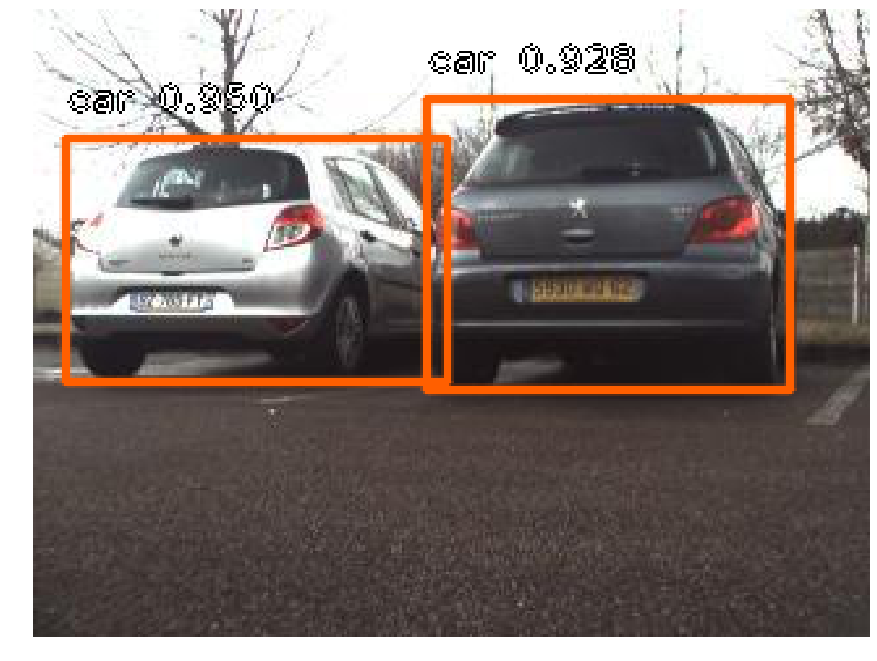

In [13]:
# Detection du contenu de l'image classique 

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

processing time:  3.1121227741241455


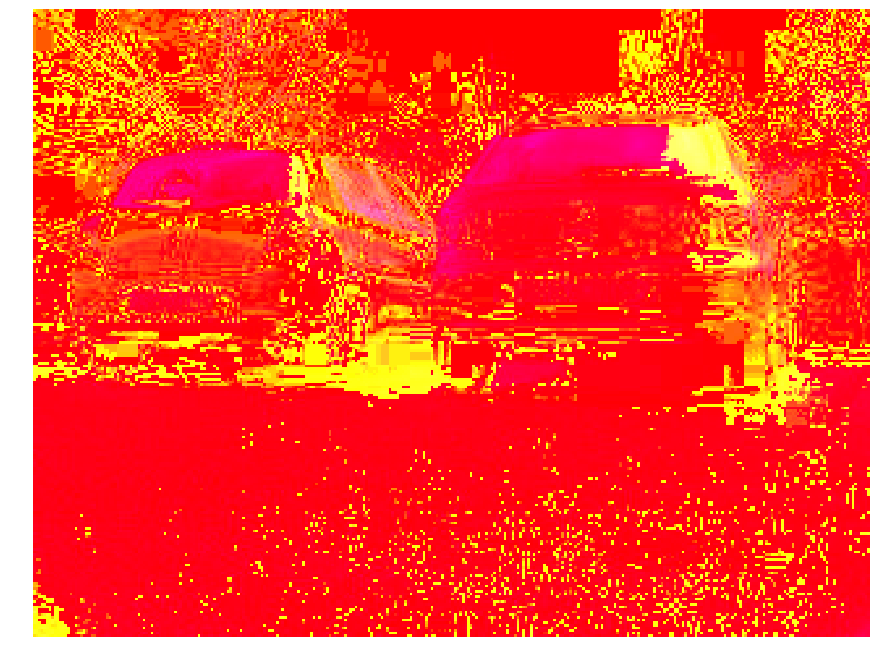

In [14]:
# Détection de l'image construite avec le DOP, l'AOP et l'intensité

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

processing time:  3.1208302974700928


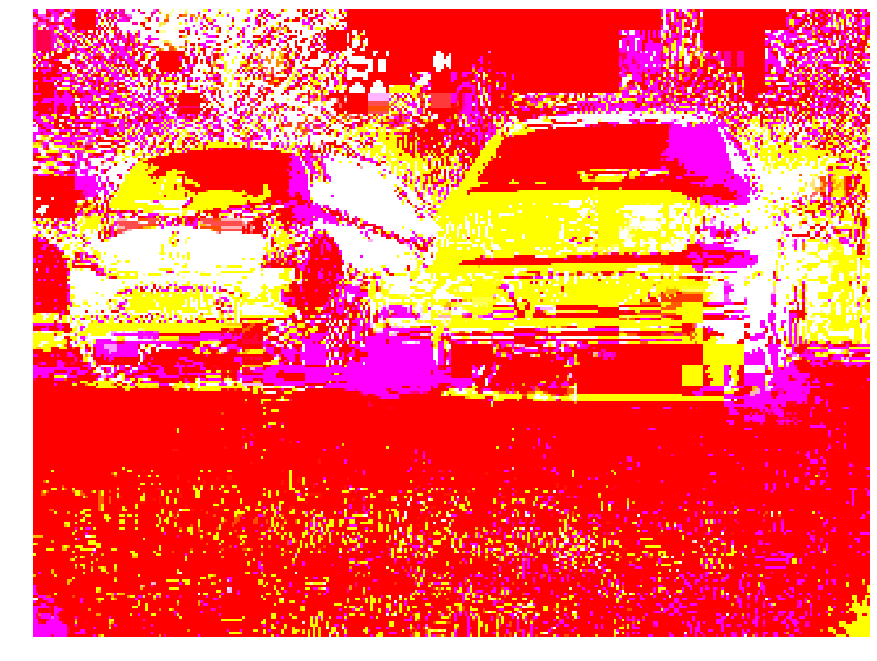

In [15]:
# Image construite avec les paramètres de Stockes

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

In [23]:
# Création de nouvelles images au format [s0, s1, s2] et [s0, aop, dop] au lieu de RGB

import matplotlib as mpl
import PIL

im1 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/0.jpg'))
im2 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/45.jpg'))
im3 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/90.jpg'))

imgs = [im1, im2, im3] # Images en rgb

im_Stockes = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

H = mat_H()

s = stockes(imgs, H)

im_Stockes[:,:,0] = rgb2gray(s[0])
im_Stockes[:,:,1] = rgb2gray(s[1])
im_Stockes[:,:,2] = rgb2gray(s[2])

print(type(im_Stockes))

mpl.image.imsave("im3_Stockes.png", im_Stockes)

im_param_pola = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

anop = calcul_aop(s)
degop = calcul_dop(s)

im_param_pola[:,:,0] = rgb2gray(s[0])
im_param_pola[:,:,1] = rgb2gray(anop)
im_param_pola[:,:,2] = rgb2gray(degop)

mpl.image.imsave("im3_param_pola.png", im_param_pola)

<class 'numpy.ndarray'>


processing time:  6.240060091018677


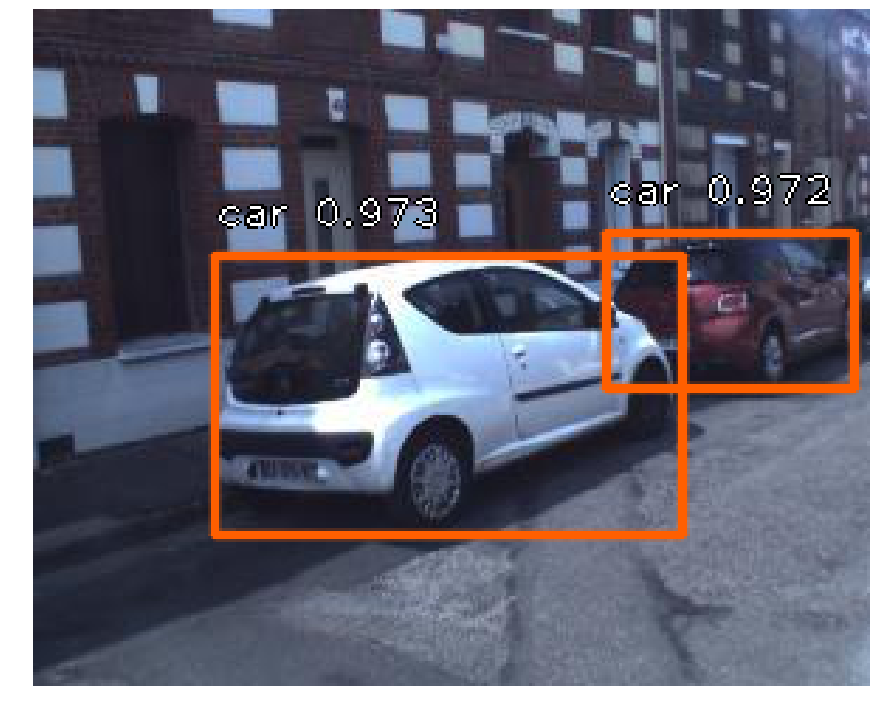

In [17]:
# Detection du contenu de l'image classique 

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

processing time:  3.6400279998779297


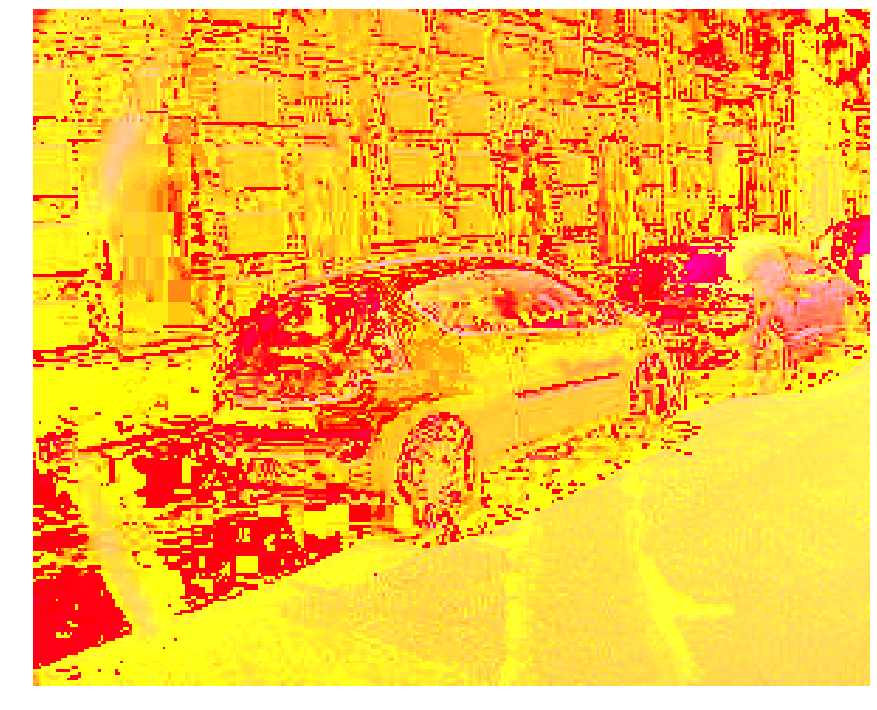

In [18]:
# Détection de l'image construite avec le DOP, l'AOP et l'intensité

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

processing time:  4.070765733718872


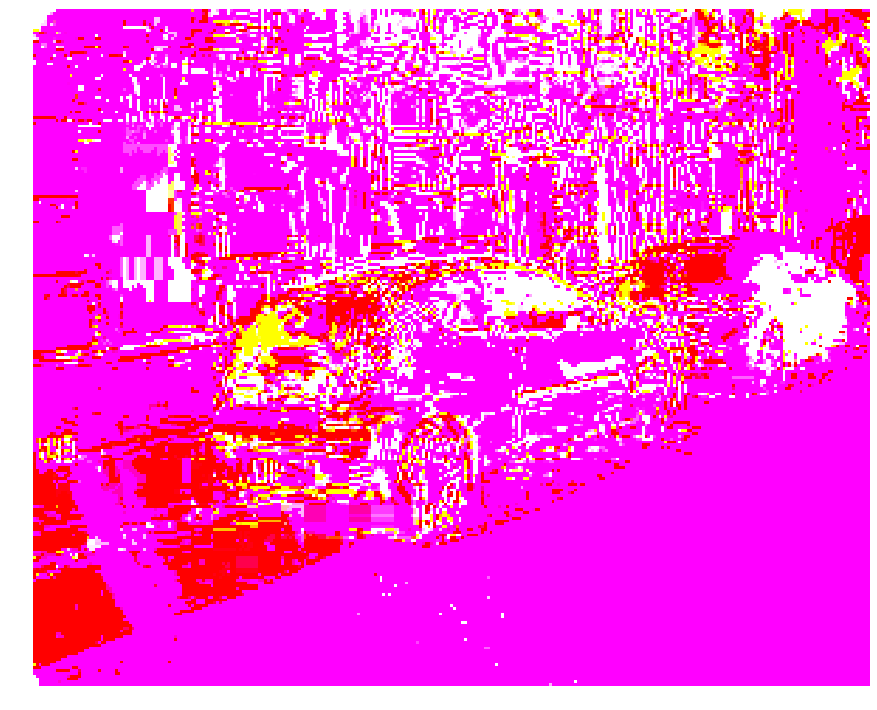

In [19]:
# Image construite avec les paramètres de Stockes

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

In [24]:
# Reprise de la même image mais en changeant l'odre des canaux 

import matplotlib as mpl
import PIL

im1 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/0.jpg'))
im2 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/45.jpg'))
im3 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/90.jpg'))

imgs = [im1, im2, im3] # Images en rgb

im_Stockes = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

H = mat_H()

s = stockes(imgs, H)

# [S1, S0, s2]

im_Stockes[:,:,1] = rgb2gray(s[0])
im_Stockes[:,:,0] = rgb2gray(s[1])
im_Stockes[:,:,2] = rgb2gray(s[2])

print(type(im_Stockes))

mpl.image.imsave("im4_Stockes.png", im_Stockes)

im_param_pola = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

anop = calcul_aop(s)
degop = calcul_dop(s)

# [s0, dop, aop]

im_param_pola[:,:,0] = rgb2gray(s[0])
im_param_pola[:,:,2] = rgb2gray(anop)
im_param_pola[:,:,1] = rgb2gray(degop)

mpl.image.imsave("im4_param_pola.png", im_param_pola)

<class 'numpy.ndarray'>


processing time:  4.84472131729126


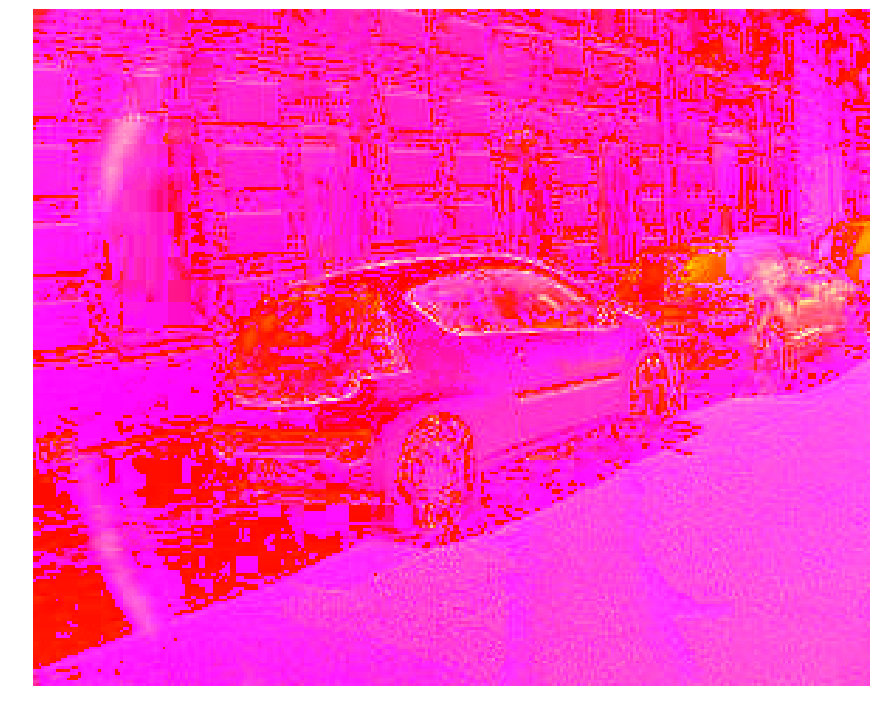

In [26]:
# Détection de l'image construite avec le DOP, l'AOP et l'intensité

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

processing time:  4.456671953201294


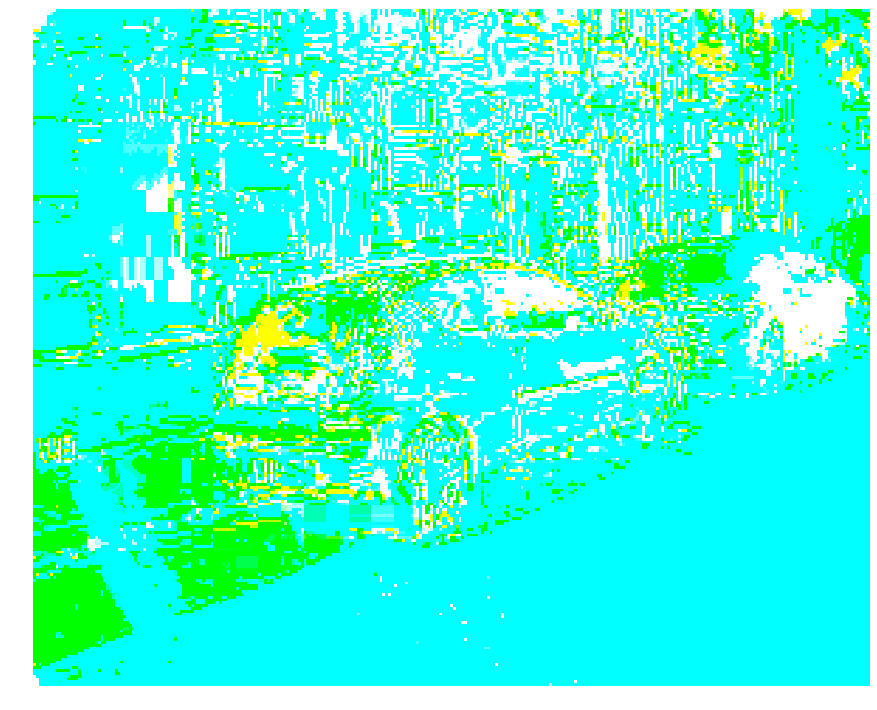

In [25]:
# Détection de l'image construite avec les paramètres de Stockes

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

In [27]:
# Reprise de la même image mais en changeant l'odre des canaux 

import matplotlib as mpl
import PIL

im1 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/0.jpg'))
im2 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/45.jpg'))
im3 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/90.jpg'))

imgs = [im1, im2, im3] # Images en rgb

im_Stockes = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

H = mat_H()

s = stockes(imgs, H)

# [S0, S2, s1]

im_Stockes[:,:,0] = rgb2gray(s[0])
im_Stockes[:,:,2] = rgb2gray(s[1])
im_Stockes[:,:,1] = rgb2gray(s[2])

print(type(im_Stockes))

mpl.image.imsave("im5_Stockes.png", im_Stockes)

im_param_pola = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

anop = calcul_aop(s)
degop = calcul_dop(s)

# [dop, s0, aop]

im_param_pola[:,:,1] = rgb2gray(s[0])
im_param_pola[:,:,2] = rgb2gray(anop)
im_param_pola[:,:,0] = rgb2gray(degop)

mpl.image.imsave("im5_param_pola.png", im_param_pola)

<class 'numpy.ndarray'>


processing time:  5.109318017959595


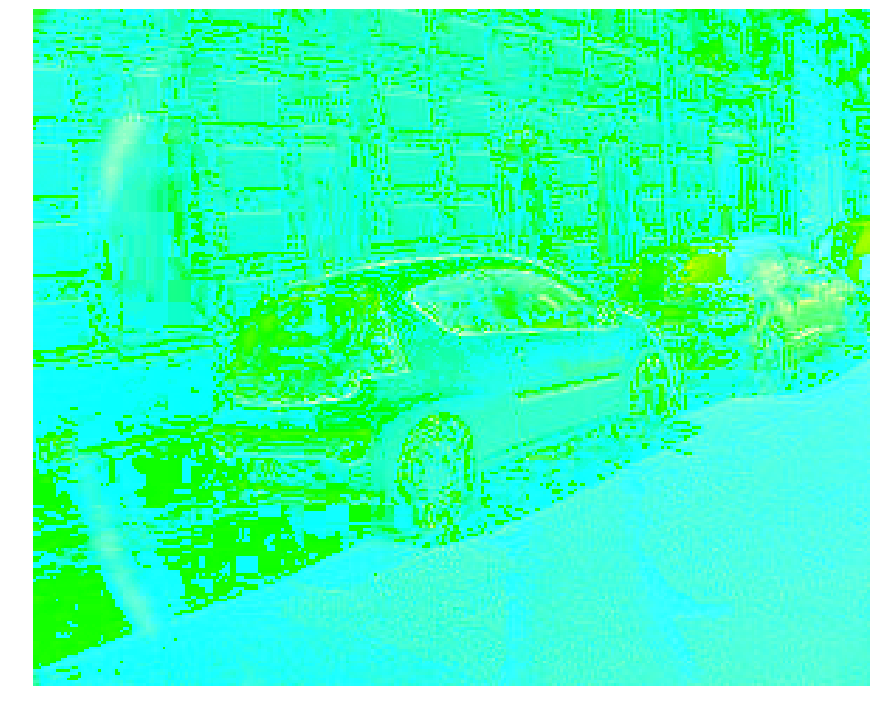

In [28]:
# Détection de l'image construite avec le DOP, l'AOP et l'intensité

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

processing time:  5.467933893203735


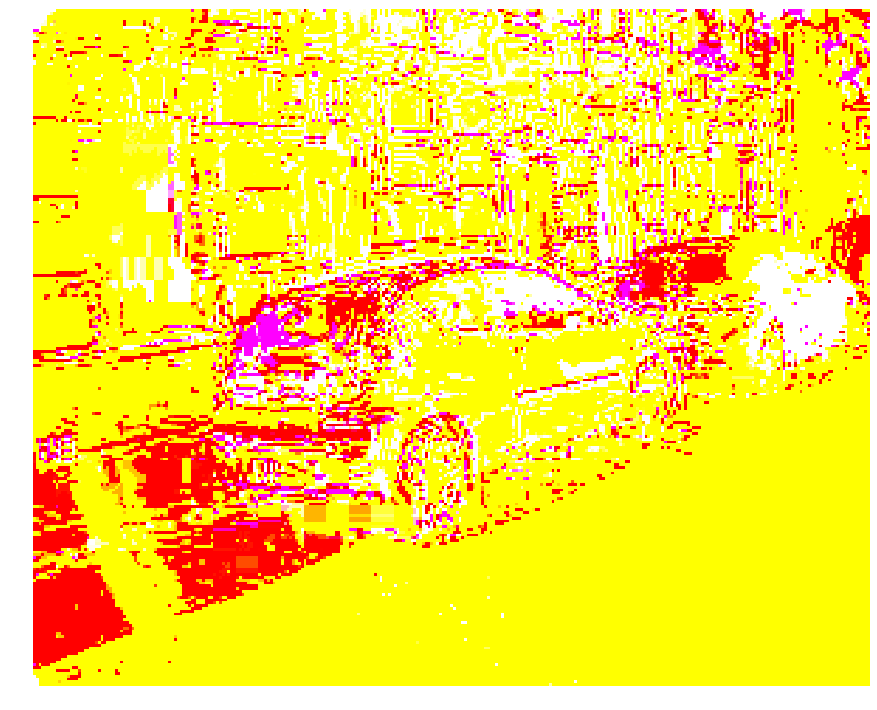

In [29]:
# Détection de l'image construite avec les paramètres de Stockes

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

## Conclusion sur la batterie de tests ##

On remarque que le réseau n'arrive pas à reconnaître les images construites à partir des caractéristiques polarimétriques. Ceci est en partie du à l'erreur présente dans les images polarimétriques puisque celles-ci n'ont pas été prise avec une caméra performante. De plus, on constate que les couleurs dominantes dans les images sont le jaune le rouge et le rose. Le réseau n'ayant pas été appris sur des images ayant ce genre de couleurs en majorité, cela biaise aussi la reconnaissance puisque le réseau s'attend à retrouver d'autres couleurs dans une voiture. 
De plus, les valeurs des couches représentant l'AOP et le DOP sont comprises respectivement entre -pi/2:pi/2 et 0:1. Ce qui n'est donc pas de la même échelle que les valeurs des couches RGB qui sont toutes comprises entre 0:255. Ce qui donne donc à la fin une image déséquilibrée.  
Il faut donc entraîner un réseau de neurones de telle sorte que celui-ci puisse traîter l'AOP et le DOP autrement que comme des couches RGB, ne serait-ce que pour des questions d'échelle.